<a href="https://colab.research.google.com/github/rivalsolmons/BTP/blob/main/Effort_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Effort and cost Estimation in Agile Software Development

In [ ]:
#@title Cost Estimation on Zia 
import math
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.metrics import classification_report



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/special work/Work Ensemble/zia2023.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_read.head()

,sNo,Effort,Vi,ActualTime,ActualCost,SizeEffort,SizeTime,SizeCost
0,1,156,4.2,63,1200000,M,L,M
1,2,202,3.7,92,1600000,L,L,L
2,3,173,4.0,56,1000000,M,M,M
3,4,331,4.5,86,2100000,L,L,L
4,5,124,4.9,32,750000,M,S,M


In [ ]:
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sNo         21 non-null     int64  
 1   Effort      21 non-null     int64  
 2   Vi          21 non-null     float64
 3   ActualTime  21 non-null     int64  
 4   ActualCost  21 non-null     int64  
 5   SizeEffort  21 non-null     object 
 6   SizeTime    21 non-null     object 
 7   SizeCost    21 non-null     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.4+ KB


In [ ]:
len(data_read)

21

In [ ]:
#@title Improving The data Qualitity 
#@markdown  

In [ ]:
print(data_read['SizeEffort'].value_counts())
print(data_read['SizeTime'].value_counts())
print(data_read['SizeCost'].value_counts())


M    7
L    7
S    7
Name: SizeEffort, dtype: int64
L    7
M    7
S    7
Name: SizeTime, dtype: int64
M    8
S    7
L    6
Name: SizeCost, dtype: int64


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# data_read['SizeEffort',	'SizeTime',	'SizeCost'] = encoder.fit_transform(data_read['SizeEffort',	'SizeTime',	'SizeCost'])

In [ ]:
dataMapping={"L":2,
             "M":1,
             "S":0
             }

In [ ]:
data_read['SizeEffort']=data_read['SizeEffort'].map(dataMapping)
data_read['SizeTime']=data_read['SizeTime'].map(dataMapping)
data_read['SizeCost']=data_read['SizeCost'].map(dataMapping)

In [ ]:
#@title New Updated Data
data_read.head()

,sNo,Effort,Vi,ActualTime,ActualCost,SizeEffort,SizeTime,SizeCost
0,1,156,4.2,63,1200000,1,2,1
1,2,202,3.7,92,1600000,2,2,2
2,3,173,4.0,56,1000000,1,1,1
3,4,331,4.5,86,2100000,2,2,2
4,5,124,4.9,32,750000,1,0,1


In [ ]:
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sNo         21 non-null     int64  
 1   Effort      21 non-null     int64  
 2   Vi          21 non-null     float64
 3   ActualTime  21 non-null     int64  
 4   ActualCost  21 non-null     int64  
 5   SizeEffort  21 non-null     int64  
 6   SizeTime    21 non-null     int64  
 7   SizeCost    21 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 1.4 KB


In [ ]:
#@title Defining Category 1 and Category 2


#features = ['Effort',	'Vi',	'ActualTime'	,	'SizeEffort',	'SizeTime',	'SizeCost']
features = ['ActualCost',	'Vi',	'ActualTime'	,	'SizeEffort',	'SizeTime',	'SizeCost']



Cat_1 = data_read[features]
Cat_2 = data_read['Effort']

In [ ]:

#@title Describing Categorical Data 
Cat_1.describe()


,ActualCost,Vi,ActualTime,SizeEffort,SizeTime,SizeCost
count,2.100000e+01,21.000000,21.000000,21.00000,21.00000,21.000000
mean,1.114286e+06,4.071429,56.428571,1.00000,1.00000,0.952381
std,7.058936e+05,0.325796,26.177417,0.83666,0.83666,0.804748
min,3.500000e+05,3.700000,21.000000,0.00000,0.00000,0.000000
25%,6.000000e+05,3.900000,35.000000,0.00000,0.00000,0.000000
50%,8.000000e+05,4.000000,52.000000,1.00000,1.00000,1.000000
75%,1.500000e+06,4.200000,80.000000,2.00000,2.00000,2.000000
max,3.200000e+06,4.900000,112.000000,2.00000,2.00000,2.000000


In [ ]:
#For debugging purpose
print(Cat_1)

    ActualCost   Vi  ActualTime  SizeEffort  SizeTime  SizeCost
0      1200000  4.2          63           1         2         1
1      1600000  3.7          92           2         2         2
2      1000000  4.0          56           1         1         1
3      2100000  4.5          86           2         2         2
4       750000  4.9          32           1         0         1
5      3200000  4.1          91           2         2         2
6       600000  4.2          35           0         0         0
7      1800000  3.8          93           2         2         2
8       500000  3.9          36           0         0         0
9      1200000  4.6          62           2         1         1
10      800000  4.6          45           1         1         1
11      650000  3.9          37           0         1         0
12      600000  3.9          32           0         0         0
13      400000  3.9          30           0         0         0
14      350000  3.9          21         

In [ ]:
#@title Describe the raw Data of splitted trained set from the dataframe
display(Cat_1)

,ActualCost,Vi,ActualTime,SizeEffort,SizeTime,SizeCost
0,1200000,4.2,63,1,2,1
1,1600000,3.7,92,2,2,2
2,1000000,4.0,56,1,1,1
3,2100000,4.5,86,2,2,2
4,750000,4.9,32,1,0,1
5,3200000,4.1,91,2,2,2
6,600000,4.2,35,0,0,0
7,1800000,3.8,93,2,2,2
8,500000,3.9,36,0,0,0
9,1200000,4.6,62,2,1,1


In [ ]:
print('The overall nummber of projects are: ',len(Cat_2))

The overall nummber of projects are:  21


In [ ]:
display(Cat_2)

0     156
1     202
2     173
3     331
4     124
5     339
6      97
7     257
8      84
9     211
10    131
11    112
12    101
13     74
14     62
15    289
16    113
17    141
18    213
19    137
20     91
Name: Effort, dtype: int64

In [ ]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2,test_size=0.20, random_state=0)
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)
ml.predict(x_test)
y_pred1 = ml.predict(x_test)

ypredx=len(x_test)
## For Debugging Purpose


# print(len(y_pred1))
# print('xtrain',len(x_train))
# print('xtest',len(x_test))

In [ ]:
import math
print(y_test)


8      84
13     74
20     91
1     202
11    112
Name: Effort, dtype: int64


In [ ]:
print(y_pred1)

[ 89.51802055  73.96429219  86.49912267 239.67789228  87.31606445]


In [ ]:
ml.predict(x_train)
x_train_pred_lr= ml.predict(x_train)

In [ ]:

from sklearn.metrics import r2_score


import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math



# print('r2 Score::',r2_score(y_test,y_pred1))
# print("Mean Absolute Diffrence:::",np.mean(abs(y_test-y_pred1)))
# print('MAE', mean_absolute_error(y_test,y_pred1))
# print('MSE', mean_squared_error(y_test,y_pred1))
# xv= math.sqrt(mean_squared_error(y_test,y_pred1))
# print("Root Mean Squared Error::",xv)

Text(0.5, 1.0, 'Cost Actual vs Predicted Linear Regresssion')

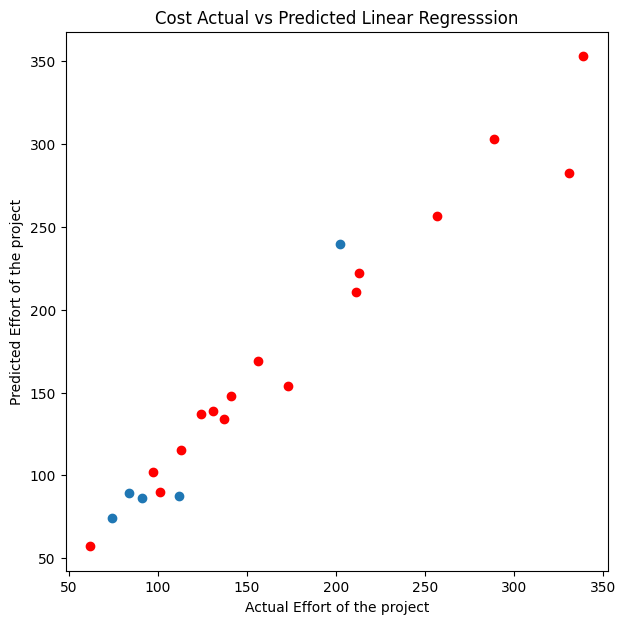

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_train, x_train_pred_lr ,label='Train Data',color='red' )
plt.scatter(y_test, y_pred1)


#plt.scatter()
plt.xlabel('Actual Effort of the project')
plt.ylabel('Predicted Effort of the project')
plt.title('Cost Actual vs Predicted Linear Regresssion')




In [ ]:
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Effort':y_pred1})

# Now calculating Diffrence between actual and predicted Values

In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Effort':y_pred1%10**5,'Difference':y_test-y_pred1})



pred_y_diff[0:21]


,Actual Values of Cost,Predicted Effort,Difference
8,84,89.518021,-5.518021
13,74,73.964292,0.035708
20,91,86.499123,4.500877
1,202,239.677892,-37.677892
11,112,87.316064,24.683936


In [ ]:
#arr = pred_y_diff.to_numpy()
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Effort':y_pred1})
arr2 =pd.DataFrame({'Difference':y_test-y_pred1})

In [ ]:

print(arr)

    Actual  Cost
8             84
13            74
20            91
1            202
11           112


In [ ]:
print(y_pred1)


[ 89.51802055  73.96429219  86.49912267 239.67789228  87.31606445]


In [ ]:
print(np.absolute(arr2))

    Difference
8     5.518021
13    0.035708
20    4.500877
1    37.677892
11   24.683936


In [ ]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred1))

diff=np.absolute(y_test-y_pred1)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#linear

The r Score on the predictrd trained Set: 0.81
MMRE 0.10450999003820138
MdMRE 0.06569072079779727
PRED 25% 100.0


In [ ]:
# @title KNeiboursRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#print('x_train length :',len(x_train))
x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)
#print(len(y_pred1))
#print('x_train length:',len(x_train))
#print('x_test length:',len(x_test))

neigh = KNeighborsRegressor(n_neighbors=2, weights='uniform')
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test) 

#print(classification_report(y_test,y_pred))

#predict =neigh.predict(y_pred)
#print(neigh.score(y_test, y_pred))

import numpy as np
from sklearn.metrics import mean_absolute_error
#

print(len(y_pred))
print("Mean Absolute error:::",mean_absolute_error(y_test,y_pred))
#print("Mean Absolute error:::",np.sqrt(mean_absolute_error(y_test,y_pred)))


# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred))



#knn

5
Mean Absolute error::: 15.3
The r Score on the predictrd trained Set: 0.85


<function matplotlib.pyplot.show(close=None, block=None)>

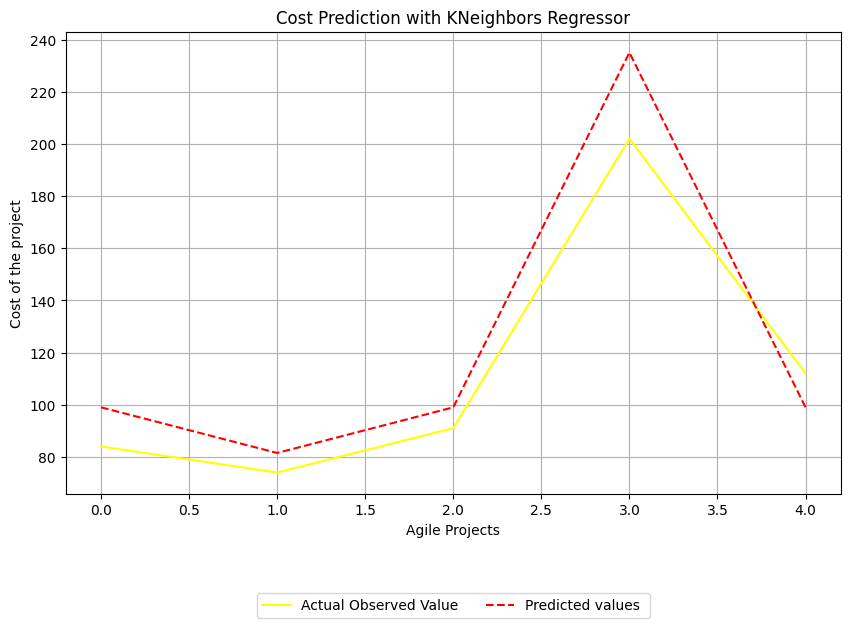

In [ ]:
 #plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Cost of the project')
plt.title('Cost Prediction with KNeighbors Regressor')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [ ]:
#
diff=np.absolute(y_test-y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

MMRE 0.12945452660799198
MdMRE 0.11607142857142858
PRED 25% 100.0


In [ ]:
import pandas as pd

pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Effort':y_pred,'Difference':y_test-y_pred})
xyy=pred_y_diff.Difference.abs()
pred_y_diff[0:21]

,Actual Values of Cost,Predicted Effort,Difference
8,84,99.0,-15.0
13,74,81.5,-7.5
20,91,99.0,-8.0
1,202,235.0,-33.0
11,112,99.0,13.0


In [ ]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Effort':y_pred,'MRE':(y_test-y_pred)/y_test})


pred_mre[0:21]

,Actual Values of Cost,Predicted Effort,MRE
8,84,99.0,-0.178571
13,74,81.5,-0.101351
20,91,99.0,-0.087912
1,202,235.0,-0.163366
11,112,99.0,0.116071


----------------------------

Decision Tree Implementation

## Decision Tree Implementation 

In [ ]:
data_read.head()

,sNo,Effort,Vi,ActualTime,ActualCost,SizeEffort,SizeTime,SizeCost
0,1,156,4.2,63,1200000,1,2,1
1,2,202,3.7,92,1600000,2,2,2
2,3,173,4.0,56,1000000,1,1,1
3,4,331,4.5,86,2100000,2,2,2
4,5,124,4.9,32,750000,1,0,1


In [ ]:
#Now to Prepare the Input and Output Features
X= data_read.drop(['Effort'],axis=1)
X.shape

(21, 7)

In [ ]:
#Splitting the dataset into Trainingfset and test set

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
#Creating and Fitting the model
regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

In [ ]:
#The Coeffitient of Detern=mination 
print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

Training R_sq is : 1.00


In [ ]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [ ]:
#prediction on the training Dataset
y_train_pred = regressor1.predict(X_train)



In [ ]:

# The r_sq
print('The r_sq  is: %.2f'% r2_score(y_train,y_train_pred))

The r_sq  is: 1.00


In [ ]:
#prediction on testing the data
y_test_pred_dt = regressor1.predict(X_test)
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_dt))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_dt))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_dt))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 735.8
Mean Absolute Error:: 21.0
Root Mean Squared Error:: 27.12563363315224


In [ ]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))

diff=np.absolute(y_test-y_test_pred_dt)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)



The r Score on the predictrd trained Set: 0.66
MMRE 0.1689849475740565
MdMRE 0.16216216216216217
PRED 25% 80.0


<function matplotlib.pyplot.show(close=None, block=None)>

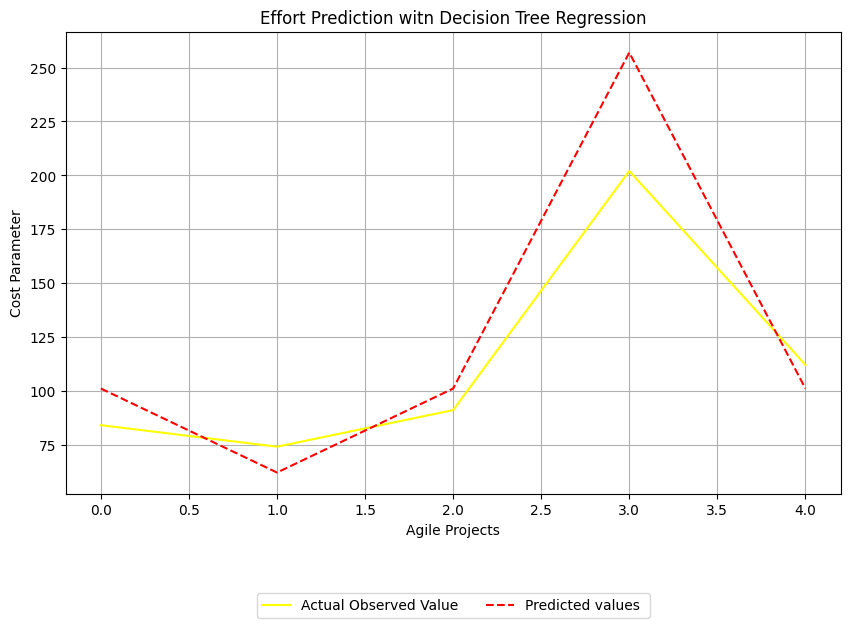

In [ ]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_dt , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Cost Parameter')
plt.title('Effort Prediction witn Decision Tree Regression')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [ ]:
pred_mre = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'MRE':(y_test-y_test_pred_dt)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Effort,Predicted Effort,MRE
8,84,101.0,-0.202381
13,74,62.0,0.162162
20,91,101.0,-0.109890
1,202,257.0,-0.272277
11,112,101.0,0.098214


In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'Difference':y_test-y_test_pred_dt})

pred_y_diff[0:21]

,Actual Values of Effort,Predicted Effort,Difference
8,84,101.0,-17.0
13,74,62.0,12.0
20,91,101.0,-10.0
1,202,257.0,-55.0
11,112,101.0,11.0


In [ ]:
#@title Random Forest Regresssor Implementation
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=30, random_state=30)

In [ ]:
#Fitting the  model 
LL_rf = model2.fit(X_train,y_train)


In [ ]:
#prediction on testing the data
y_test_pred_rf = model2.predict(X_test)

In [ ]:
#Training Model Evaluation


print('The Model Score on the predictrd training Set: %.2f'% LL_rf.score(X_train,y_train))
print('r2 Score ', r2_score(y_test,y_test_pred_rf))

The Model Score on the predictrd training Set: 0.98
r2 Score  0.5617694892306675


In [ ]:
# print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_rf))
# print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_rf))
# xv= math.sqrt(mean_squared_error(y_test,y_test_pred_rf))
# print("Root Mean Squared Error::",xv)

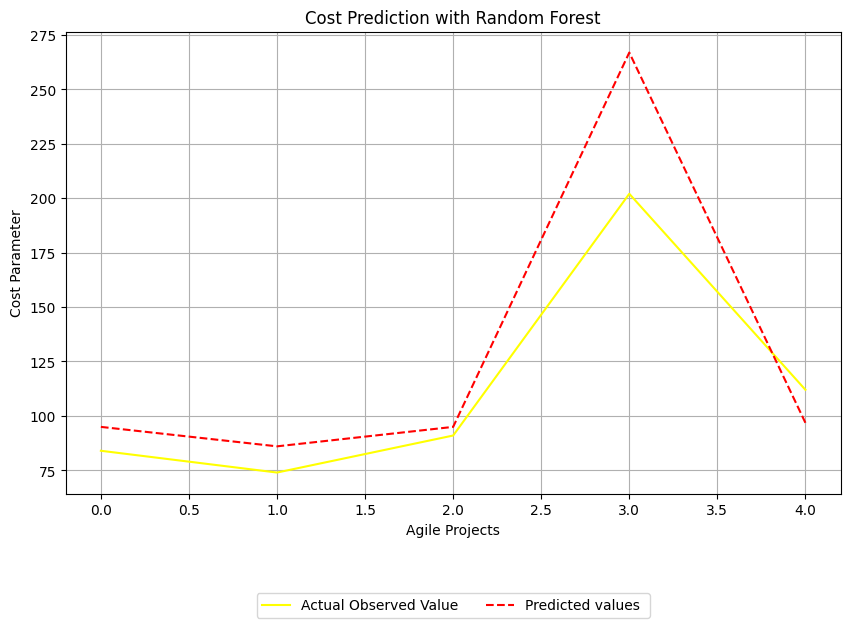

In [ ]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_rf , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Cost Parameter')
plt.title('Cost Prediction with Random Forest')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [ ]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Effort':y_test_pred_rf,'MRE':(y_test-y_test_pred_rf)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Cost,Predicted Effort,MRE
8,84,94.966667,-0.130556
13,74,86.033333,-0.162613
20,91,94.966667,-0.043590
1,202,266.866667,-0.321122
11,112,96.833333,0.135417


Evaluation Parameters

In [ ]:

# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_rf))

diff=np.absolute(y_test-y_test_pred_rf)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#

The r Score on the predictrd trained Set: 0.56
MMRE 0.15865933812715993
MdMRE 0.1354166666666667
PRED 25% 80.0


# Support Vector Machine

In [ ]:
def RBF(X, gamma):
    
    # Free parameter gamma
    if gamma == None:
        gamma = 1.0/X.shape[1]
        
    # RBF kernel Equation
    K = np.exp(-gamma * np.sum((X - X[:,np.newaxis])**2, axis = -1))
    
    return K

In [ ]:
# #@title Support Vector
# #import warnings
# from sklearn import svm
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# import pandas as pd
# from sklearn.model_selection import GridSearchCV


# # Categorical To continious 
# X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


# svm = SVC(kernel="linear",C=1)
# svm.fit(X_train,y_train)

# #clf = svm.SVC()
# #clf.fit(Cat_1, Cat_2)

# y_pred_svm=svm.predict(X_test)
# import numpy as np
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
# #
# print("Mean Absolute error:::",np.sqrt(mean_absolute_error(y_test,y_pred_svm)))

# print("Mean Squared Error::",mean_squared_error(y_test,y_pred_svm))
# xv= math.sqrt(mean_squared_error(y_test,y_pred_svm))
# print("Root Mean Squared Error::",xv)


Mean Absolute error::: 3.3763886032268267
Mean Squared Error:: 139.0
Root Mean Squared Error:: 11.789826122551595


In [518]:
#@title ADA BOOST
from sklearn.ensemble import AdaBoostRegressor


# Categorical To continious 
X_train_ada,X_test_ada,y_train_ada,y_test_ada = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


ada = AdaBoostRegressor()
ada.fit(X_train_ada,y_train_ada)

#clf = svm.SVC()
#clf.fit(Cat_1, Cat_2)
y_train_pred_ada=ada.predict(X_train_ada)
y_pred_ada=ada.predict(X_test_ada)



# The r_sq
print('The r Score on the predictrd test Set: %.2f'% r2_score(y_test_ada,y_pred_ada))
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_train_ada,y_train_pred_ada))

diff=np.absolute(y_test_ada-y_pred_ada)
MRE=diff/y_test_ada
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#


The r Score on the predictrd test Set: 0.67
The r Score on the predictrd trained Set: 1.00
MMRE 0.16184209043119935
MdMRE 0.16216216216216217
PRED 25% 80.0


In [ ]:
# #@title ADA BOOST
# from sklearn.ensemble import AdaBoostRegressor




# # Categorical To continious 
# X_train_ada,X_test_ada,y_train_ada,y_test_sv = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


# svm = SVR(kernel="linear",gamma=0.1, C=0.02)
# svm.fit(X_train_ada,y_train_ada)

# #clf = svm.SVC()
# #clf.fit(Cat_1, Cat_2)
# y_train_pred_svm=svm.predict(X_train_ada)
# y_pred_svm=svm.predict(X_test_ada)



# # The r_sq
# print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test_sv,y_pred_svm))

# diff=np.absolute(y_test_sv-y_pred_svm)
# MRE=diff/y_test_sv
# MMRE=np.mean(MRE)
# MdMRE=np.median(MRE)
# P=MRE[MRE<.25]
# Pred=(P.size/MRE.size) * 100
# print("MMRE",MMRE)
# print("MdMRE",MdMRE)
# print("PRED 25%",Pred)

# #


In [ ]:
#prediction on testing the data
#y_test_pred_svm = y_pred111.predict(y_test,y_test_pred_svm)

In [520]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test_ada,'Predicted Effort':y_pred_ada,'Difference':y_test_ada-y_pred_ada})

pred_y_diff[0:21]

,Actual Values of Effort,Predicted Effort,Difference
8,84,101.0,-17.0
13,74,62.0,12.0
20,91,101.0,-10.0
1,202,257.0,-55.0
11,112,105.0,7.0


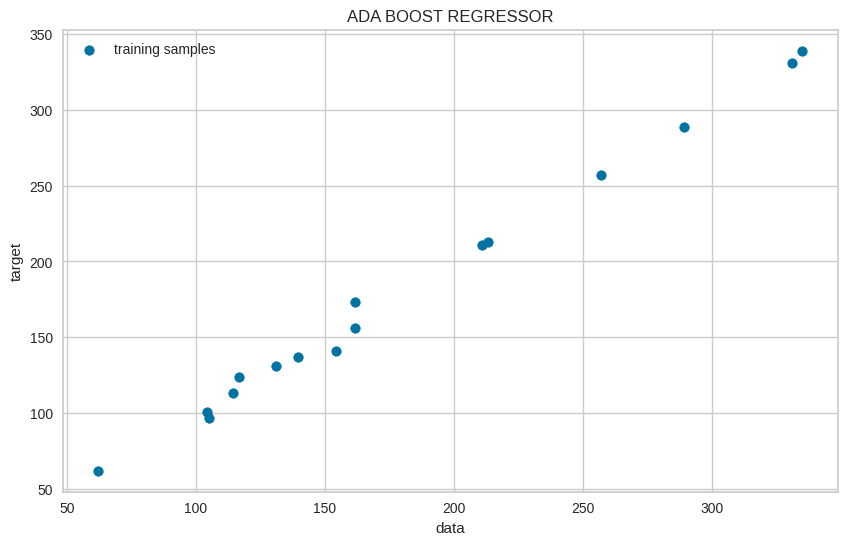

In [527]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")
# X_train_ada,X_test_ada,y_train_ada,y_test_ada
plt.figure()
plt.scatter(y_train_pred_ada,y_train_ada , label="training samples")
#plt.plot(X_test_ada,y_test_ada, color=colors[1], label="n_estimators=1", linewidth=2)
# plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("ADA BOOST REGRESSOR")
plt.legend()
plt.show()

In [ ]:
#@title Ensemble Learning 

data_read.head()

,sNo,Effort,Vi,ActualTime,ActualCost,SizeEffort,SizeTime,SizeCost
0,1,156,4.2,63,1200000,1,2,1
1,2,202,3.7,92,1600000,2,2,2
2,3,173,4.0,56,1000000,1,1,1
3,4,331,4.5,86,2100000,2,2,2
4,5,124,4.9,32,750000,1,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# data_read['ActualCost'] = encoder.fit_transform(data_read['ActualCost'])
# data_read

In [ ]:
dff = data_read.sample(21)
dff_train = dff.iloc[:14,:].sample(10)
dff_val = dff.iloc[14:18,:].sample(4)
dff_test = dff.iloc[17:,:].sample(3)

In [ ]:
dff_train

,sNo,Effort,Vi,ActualTime,ActualCost,SizeEffort,SizeTime,SizeCost
17,18,141,4.0,52,1000000,1,1,1
12,13,101,3.9,32,600000,0,0,0
6,7,97,4.2,35,600000,0,0,0
3,4,331,4.5,86,2100000,2,2,2
14,15,62,3.9,21,350000,0,0,0
2,3,173,4.0,56,1000000,1,1,1
18,19,213,4.0,80,1500000,2,2,2
15,16,289,4.0,112,2000000,2,2,2
8,9,84,3.9,36,500000,0,0,0
4,5,124,4.9,32,750000,1,0,1


In [ ]:
X_test = dff_val.iloc[:,0:8].values
y_test = dff_val.iloc[:-1].values

# len(X_test)
# len(y_test)


In [ ]:
#@title Bagging with 3 Decision Trees 
df_bag = dff_train.sample(7,replace=True) 

X= df_bag.iloc[:,0:8]
Y= df_bag.iloc[:,-1]

df_bag

,sNo,Effort,Vi,ActualTime,ActualCost,SizeEffort,SizeTime,SizeCost
4,5,124,4.9,32,750000,1,0,1
4,5,124,4.9,32,750000,1,0,1
12,13,101,3.9,32,600000,0,0,0
2,3,173,4.0,56,1000000,1,1,1
6,7,97,4.2,35,600000,0,0,0
14,15,62,3.9,21,350000,0,0,0
2,3,173,4.0,56,1000000,1,1,1


In [ ]:
X

,sNo,Effort,Vi,ActualTime,ActualCost,SizeEffort,SizeTime,SizeCost
4,5,124,4.9,32,750000,1,0,1
4,5,124,4.9,32,750000,1,0,1
12,13,101,3.9,32,600000,0,0,0
2,3,173,4.0,56,1000000,1,1,1
6,7,97,4.2,35,600000,0,0,0
14,15,62,3.9,21,350000,0,0,0
2,3,173,4.0,56,1000000,1,1,1


In [ ]:
Y

4     1
4     1
12    0
2     1
6     0
14    0
2     1
Name: SizeCost, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score 

In [ ]:
def evaluate(clf,X,Y):
  clf.fit(X,Y)
  plot_tree(clf)
  plt.show()
  # plot_decision_regions(X.values,Y.values, clf=clf , legend=2)
  y_pred=clf.predict(X_test)
  y_pred
  #print(accuracy_score(y_test,y_pred))

In [ ]:
#@title Default title text
dt_bag1 = DecisionTreeRegressor()
dt_bag11 = DecisionTreeClassifier()
#

We're adding out Bag 1 to make a low bias and high variance model

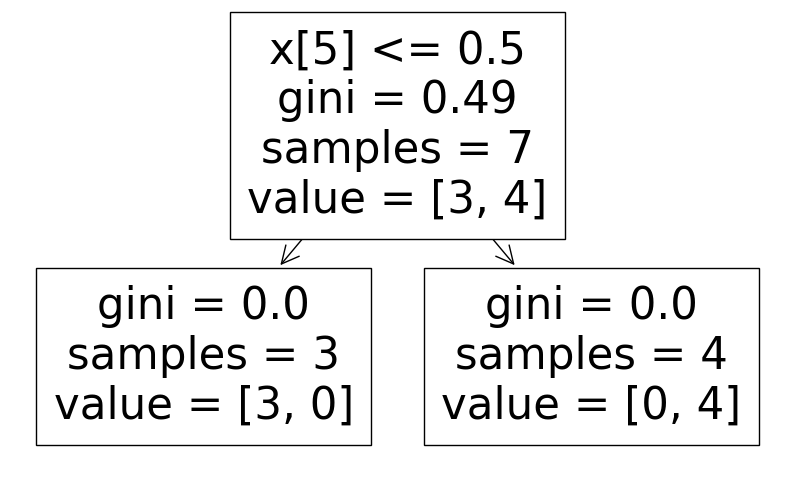

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Decision tree Classifier 

evaluate(dt_bag11,X,Y)

In [ ]:
#accuracy_score(y_pred,y_test)

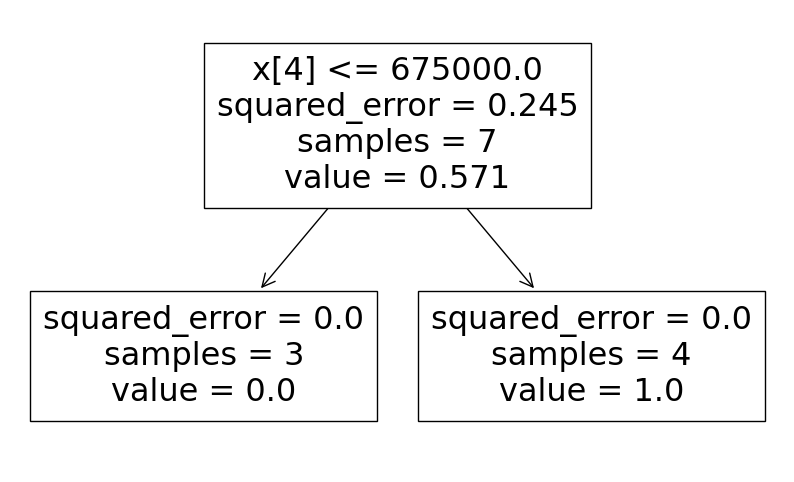

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
evaluate(dt_bag1,X,Y)

In [ ]:
#@title Bagging with 3 Decision Trees 
df_bag = dff_train.sample(7,replace=True) 

X= df_bag.iloc[:,0:8]
Y= df_bag.iloc[:,-1]

df_bag

,sNo,Effort,Vi,ActualTime,ActualCost,SizeEffort,SizeTime,SizeCost
8,9,84,3.9,36,500000,0,0,0
17,18,141,4.0,52,1000000,1,1,1
2,3,173,4.0,56,1000000,1,1,1
8,9,84,3.9,36,500000,0,0,0
6,7,97,4.2,35,600000,0,0,0
17,18,141,4.0,52,1000000,1,1,1
17,18,141,4.0,52,1000000,1,1,1


In [ ]:
X

,sNo,Effort,Vi,ActualTime,ActualCost,SizeEffort,SizeTime,SizeCost
8,9,84,3.9,36,500000,0,0,0
17,18,141,4.0,52,1000000,1,1,1
2,3,173,4.0,56,1000000,1,1,1
8,9,84,3.9,36,500000,0,0,0
6,7,97,4.2,35,600000,0,0,0
17,18,141,4.0,52,1000000,1,1,1
17,18,141,4.0,52,1000000,1,1,1


In [ ]:
Y

8     0
17    1
2     1
8     0
6     0
17    1
17    1
Name: SizeCost, dtype: int64

In [ ]:
#@title Bagging with 3 Decision Trees 2nd Bag
df_bag2 = dff_train.sample(7,replace=True) 

X= df_bag2.iloc[:,0:8]
Y= df_bag2.iloc[:,-1]

df_bag

,sNo,Effort,Vi,ActualTime,ActualCost,SizeEffort,SizeTime,SizeCost
8,9,84,3.9,36,500000,0,0,0
17,18,141,4.0,52,1000000,1,1,1
2,3,173,4.0,56,1000000,1,1,1
8,9,84,3.9,36,500000,0,0,0
6,7,97,4.2,35,600000,0,0,0
17,18,141,4.0,52,1000000,1,1,1
17,18,141,4.0,52,1000000,1,1,1


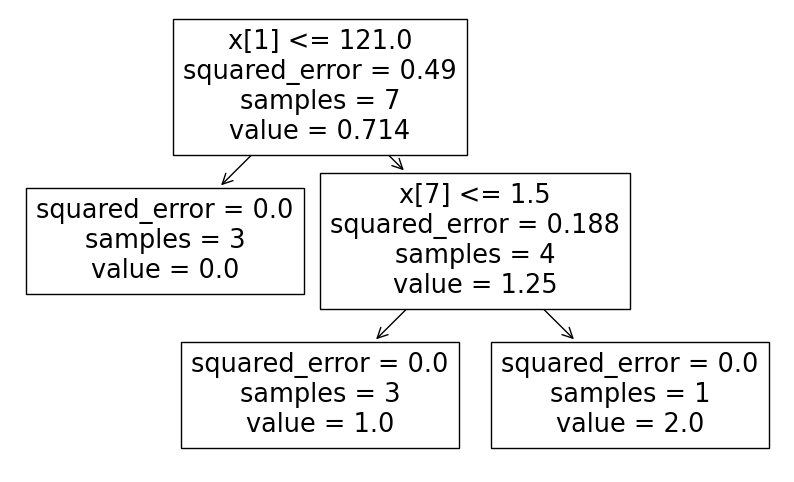

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
dt_bag2 = DecisionTreeRegressor()
evaluate(dt_bag2,X,Y)

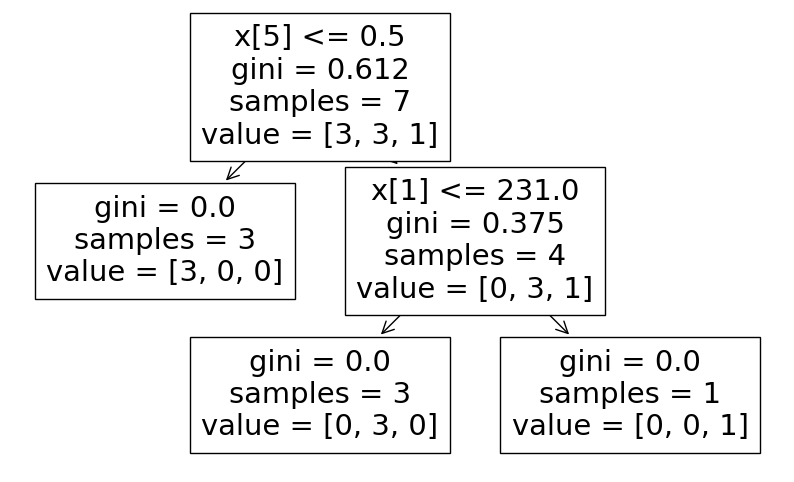

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
dt_bag22 = DecisionTreeClassifier()
evaluate(dt_bag22,X,Y)

In [ ]:
#@title Bagging with 3 Decision Trees 3rd Bag
df_bag3 = dff_train.sample(7,replace=True) 

X= df_bag3.iloc[:,0:8]
Y= df_bag3.iloc[:,-1]

df_bag3

,sNo,Effort,Vi,ActualTime,ActualCost,SizeEffort,SizeTime,SizeCost
18,19,213,4.0,80,1500000,2,2,2
6,7,97,4.2,35,600000,0,0,0
6,7,97,4.2,35,600000,0,0,0
3,4,331,4.5,86,2100000,2,2,2
4,5,124,4.9,32,750000,1,0,1
3,4,331,4.5,86,2100000,2,2,2
18,19,213,4.0,80,1500000,2,2,2


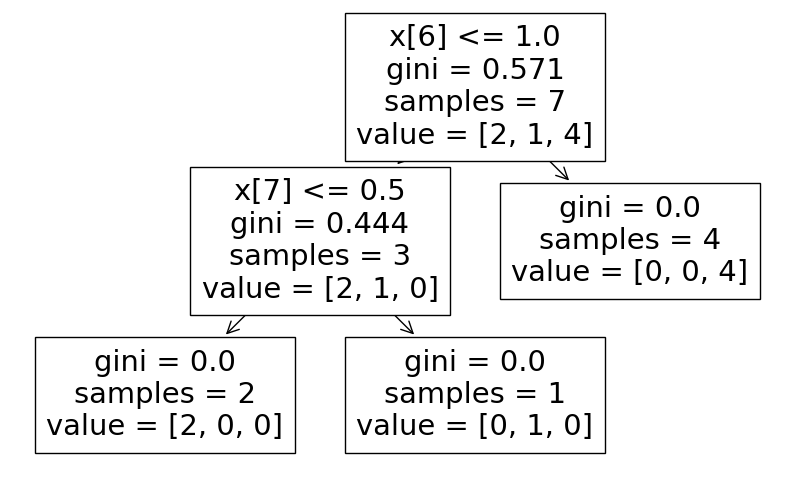

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,Y)

In [ ]:
#@title Using Ensemble Technique 1st set of Algorithms

# 1
from sklearn.ensemble import BaggingRegressor



In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(Cat_1,Cat_2,test_size=0.25,random_state=0)

# now printing the overall sizes of our splitted result
print("Train / Test Sets sizes: ", x_train.shape,x_test.shape,y_train.shape,y_test.shape )

Train / Test Sets sizes:  (16, 6) (5, 6) (16,) (3, 8)


In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [ ]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [ ]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.8112846520107492
R^2 score for DT 0.5847713285869434
R^2 score for KNN 0.857833956799807


In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [ ]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.964
Test Coefficient of R^2 : 0.446


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,0.95],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=2, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 2 folds for each of 144 candidates, totalling 288 fits
Train R^2 Score : 0.939
Test R^2 Score : 0.536
Best R^2 Score Through Grid Search : 0.902
Best Parameters :  {'base_estimator': LinearRegression(), 'bootstrap': False, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 15}
CPU times: user 270 ms, sys: 17.4 ms, total: 287 ms
Wall time: 6.98 s


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [ 4.82650024e-01  5.31554957e-01  4.90736146e-01  7.25238563e-01
  7.93510541e-01  8.10349813e-01  6.56687735e-01  7.13056339e-01
  7.29654219e-01  8.64718226e-01  8.64383908e-01  8.60027626e-01
  7.63101224e-01  7.75475131e-01  7.72844072e-01  8.88733660e-01
  8.73898741e-01  8.55292137e-01  5.41744181e-01  4.44334518e-01
  5.12131822e-01  7.78980650e-01  7.72966450e-01  7.75276964e-01
  5.23389621e-01  4.88528458e-01  5.80799609e-01  7.97525021e-01
  7.94045442e-01  8.31727534e-01  5.73005213e-01  6.85724471e-01
  7.30160963e-01  7.62514320e-01  7.93947619e-01  8.23162277e-01
  7.39449028e-01  7.55443610e-01  7.48170661e-01  8.75350396e-01
  8.76107846e-01  8.68392473e-01  6.76415000e-01  6.60370736e-01
  6.05198450e-01  8.84524361e-01  8.63312508e-01  8.60430361e-01
  7.72491589e-01  8.23313010e-01  6.90989106e-01  7.87991740e-01
  8.17345372e-01

In [ ]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [ ]:
Y_test_pred_BAGGING

array([ 78.51461233,  66.53156358,  68.80060603, 242.79988803,
        73.89727156, 168.87442962])

In [ ]:
Y_train_pred_BAGGING

array([ 53.14584279, 239.58674246,  98.0351982 , 133.93815758,
       179.4563295 , 159.27996186, 336.54129219, 129.152034  ,
       215.88932346, 258.59799198, 154.35049758, 301.45421891,
       175.12731007, 301.96671837,  78.1740004 ])

In [ ]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=diff/Y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

MMRE 0.27230750235139356
MdMRE 0.1957095709570957
PRED 25% 57.14285714285714


In [ ]:
#@title Third Approach Using Ensemble Learning - Bagging with use of Bootstrapping 

 


In [ ]:
#@title Using Ensemble Technique Second set of Algorithms
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(Cat_1,Cat_2,test_size=0.30,random_state=0)

# now printing the overall sizes of our splitted result
print("Train / Test Sets sizes: ", x_train.shape,x_test.shape,y_train.shape,y_test.shape )

Train / Test Sets sizes:  (16, 6) (5, 6) (16,) (3, 8)


In [ ]:
rkf = RandomForestRegressor()
dt = DecisionTreeRegressor()
ada = AdaBoostRegressor()

In [ ]:
from logging import addLevelName
rkf.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
ada.fit(X_train,Y_train)

AdaBoostRegressor()

In [ ]:
y_pred1 = rkf.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = ada.predict(X_test)

In [ ]:
print("R^2 score for RF",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for ADA_B",r2_score(Y_test,y_pred3))

R^2 score for RF 0.560268279331262
R^2 score for DT 0.7891699955614736
R^2 score for ADA_B 0.4823198698032253


In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [ ]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.952
Test Coefficient of R^2 : 0.145


In [ ]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,14,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.946
Test R^2 Score : 0.859
Best R^2 Score Through Grid Search : 0.886
Best Parameters :  {'base_estimator': LinearRegression(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 14}
CPU times: user 379 ms, sys: 12.7 ms, total: 391 ms
Wall time: 9.21 s


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [ 4.90947201e-01  4.14861757e-01  4.29552528e-01  5.22925277e-01
  4.69017384e-01  5.65669174e-01  7.10830461e-01  6.83314711e-01
  6.51229433e-01  7.79823420e-01  7.60767170e-01  7.46761721e-01
  6.35347228e-01  6.40480174e-01  5.50237804e-01  7.72699844e-01
  7.29931635e-01  7.18013303e-01  6.24839767e-01  4.88906973e-01
  4.85779460e-01  6.54063897e-01  6.52862485e-01  6.35291631e-01
  2.93994768e-01  3.68875569e-01  5.21948168e-01  4.72092176e-01
  4.53932694e-01  5.79312706e-01  5.66739733e-01  6.01940500e-01
  5.99276883e-01  6.32501726e-01  6.48470527e-01  6.69309640e-01
  6.16198719e-01  6.49306663e-01  6.34849094e-01  7.81776240e-01
  7.73185126e-01  7.59892203e-01  2.79301300e-01  2.52265563e-01
  4.71855122e-01  4.71393199e-01  4.22363901e-01  4.16389452e-01
 -3.48768040e-01 -1.77684365e-01 -3.96363136e-02  7.09836737e-01
  6.27782293e-01

In [ ]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [ ]:
Y_test_pred_BAGGING

array([ 84.37542543,  72.84541696,  84.93393227, 240.03877723,
        95.4072142 , 142.73251342,  63.63774583])

In [ ]:
Y_train_pred_BAGGING

array([229.43318106,  96.25606837, 135.94283181, 137.26981161,
       156.48459414, 374.68523677, 130.55568813, 203.42483911,
       258.24293125, 154.18948288, 288.67836269, 177.91410673,
       288.23077902,  90.16765573])

In [ ]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=diff/Y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

MMRE 0.07702414097648938
MdMRE 0.06666008497111141
PRED 25% 100.0


In [ ]:
#@title Our GS_CV ENSEMBLE LI KNN

In [ ]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.944
Test R^2 Score : 0.837
Best R^2 Score Through Grid Search : 0.879
Best Parameters :  {'base_estimator': LinearRegression(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 10}
CPU times: user 382 ms, sys: 21.5 ms, total: 404 ms
Wall time: 10.1 s


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [ 4.90947201e-01  3.83547416e-01  4.29552528e-01  5.22925277e-01
  4.65452945e-01  5.65669174e-01  7.10830461e-01  6.51617827e-01
  6.51229433e-01  7.79823420e-01  7.65405457e-01  7.46761721e-01
  6.35347228e-01  6.31435937e-01  5.50237804e-01  7.72699844e-01
  7.44583200e-01  7.18013303e-01  6.24839767e-01  4.29440918e-01
  4.85779460e-01  6.54063897e-01  6.52366075e-01  6.35291631e-01
  2.93994768e-01  4.52310616e-01  5.21948168e-01  4.72092176e-01
  4.58312148e-01  5.79312706e-01  5.66739733e-01  6.00903331e-01
  5.99276883e-01  6.32501726e-01  6.39445332e-01  6.69309640e-01
  6.16198719e-01  6.59066427e-01  6.34849094e-01  7.81776240e-01
  7.84695357e-01  7.59892203e-01  2.79301300e-01  3.31262544e-01
  4.71855122e-01  4.71393199e-01  4.26006515e-01  4.16389452e-01
 -3.48768040e-01 -9.25581652e-01 -3.96363136e-02  7.09836737e-01
  5.01515590e-01

In [ ]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.944
Test R^2 Score : 0.837
Best R^2 Score Through Grid Search : 0.879
Best Parameters :  {'base_estimator': LinearRegression(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 10}
CPU times: user 382 ms, sys: 19.5 ms, total: 401 ms
Wall time: 10 s


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [ 4.90947201e-01  3.83547416e-01  4.29552528e-01  5.22925277e-01
  4.65452945e-01  5.65669174e-01  7.10830461e-01  6.51617827e-01
  6.51229433e-01  7.79823420e-01  7.65405457e-01  7.46761721e-01
  6.35347228e-01  6.31435937e-01  5.50237804e-01  7.72699844e-01
  7.44583200e-01  7.18013303e-01  6.24839767e-01  4.29440918e-01
  4.85779460e-01  6.54063897e-01  6.52366075e-01  6.35291631e-01
  2.93994768e-01  4.52310616e-01  5.21948168e-01  4.72092176e-01
  4.58312148e-01  5.79312706e-01  5.66739733e-01  6.00903331e-01
  5.99276883e-01  6.32501726e-01  6.39445332e-01  6.69309640e-01
  6.16198719e-01  6.59066427e-01  6.34849094e-01  7.81776240e-01
  7.84695357e-01  7.59892203e-01  2.79301300e-01  3.31262544e-01
  4.71855122e-01  4.71393199e-01  4.26006515e-01  4.16389452e-01
 -3.48768040e-01 -9.25581652e-01 -3.96363136e-02  7.09836737e-01
  5.01515590e-01

In [ ]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [ ]:
Y_test_pred_BAGGING

array([ 80.7809542 ,  70.22071714,  80.88322871, 240.63866923,
        92.96794085, 146.0132055 ,  62.23838171])

In [ ]:
Y_train_pred_BAGGING

array([232.44076441,  93.25315403, 135.77362239, 141.34435436,
       156.55421186, 372.6693546 , 133.18189032, 206.4680096 ,
       258.49326209, 154.75273393, 290.73201754, 178.74879158,
       286.14268869,  86.83749644])

In [ ]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=diff/Y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

MMRE 0.09717511476169909
MdMRE 0.11117331087798622
PRED 25% 100.0


In [ ]:
%%time

# n_samples = data_read.data.shape[0]
# n_features = data_read.data.shape[1]

params = {'base_estimator': [RandomForestRegressor(), DecisionTreeRegressor(), AdaBoostRegressor()],
          'n_estimators': [10,15,21],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,8],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)


     

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py", line 337, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py", line 420, in _fit
    raise ValueError("max_features must be <= n_fe

Train R^2 Score : 0.993
Test R^2 Score : 0.585
Best R^2 Score Through Grid Search : 0.805
Best Parameters :  {'base_estimator': AdaBoostRegressor(), 'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 15}
CPU times: user 1.24 s, sys: 106 ms, total: 1.35 s
Wall time: 1min 57s


In [ ]:
Y_test_pred_BAGGING= bagging_regressor_grid.predict(X_test)
Y_train_pred_BAGGING= bagging_regressor_grid.predict(X_train)

In [ ]:
Y_test_pred_BAGGING

array([107.36666667, 107.57777778, 107.21111111, 241.53333333,
       109.48888889, 125.39      , 107.57777778])

In [ ]:
Y_train_pred_BAGGING

array([212.91111111, 106.94444444, 133.27222222, 123.19555556,
       160.25111111, 335.8       , 122.2       , 208.81555556,
       257.        , 153.22333333, 331.        , 163.19904762,
       289.        , 107.57777778])

In [ ]:
#@title Evaluation results  Ensemble Learning Bagging - With Our Hybrid Approach using GridSearchCV 
# print('The r Score on the predictrd trained Set: %.2f'% r2_score(Y_test,Y_test_pred_BAGGING))

diff=np.absolute(Y_test-Y_test_pred_BAGGING)
MRE=diff/Y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

MMRE 0.27230750235139356
MdMRE 0.1957095709570957
PRED 25% 57.14285714285714


In [ ]:
#@title Decision tree
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# data_read = pd.read_csv('Zia_upd22.csv')

# X = data_read.iloc[:,0:8].values
# y = data_read.iloc[:,:-1].values
# regressor = DecisionTreeRegressor(random_state =0)
# regressor.fit(X, y)




In [ ]:
# # @title Let Us calculate Estimated Cost With Raw Data
# x=regressor.predict([[154,4.2,0.77,2.7,12,22,310000,63]])
# print("Estimated Cost:",x[0]*100000)



In [ ]:
# #@title Decision Tree Regression 
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# #data_read = pd.read_csv('Zia_upd22.csv')

# #X = data_read.iloc[:,1:8].values
# #y = data_read.iloc[:,-1].values
# #X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20 )



In [ ]:
# X.shape

In [ ]:
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
# regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

#coefficient of determination 
# print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

In [ ]:
# For the training model EVALUATION
# from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [ ]:
#Prediction on the training dataset
y_train_pred= regressor1.predict(X_train)
#y_train= regressor1.predict(X_train)

In [ ]:
# The r_sq
# print('The r_sq ,is :',r2_score(y_train,y_train_pred))

Now Calculating r_score 

In [ ]:
# The r_sq
#print('The r_sq y_test , y_test_pred is: %.2f'% r2_score(y_test,y_test_pred))

In [ ]:
# # plotting the observed and predicted values 


# # Setting the boundaries and parameters

# plt.rcParams['figure.figsize'] = (10,6)
# x_ax =range(len(X_test))

# #plotting 
# plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
# plt.plot(x_ax,y_test_pred , label='Predicted values ' , color='red' , linestyle ='--')
# plt.grid()
# plt.ylabel('dcscfvfdscd')
# plt.xlabel('fffdcdcscfvfdscd')
# plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [ ]:
from yellowbrick.regressor import PredictionError 
visualizer = PredictionError(regressor1)
visualizer.fit(X_train, y_train)
visualizer.fit(X_test,y_test)
visualizer.score(X_test,y_test)
visualizer.poof()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_test,y_test_pred ))

In [ ]:
#pip install yellowbrick

In [ ]:
# Residuals plot 
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor1)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [ ]:
# testing the Model Evaluation



In [ ]:
# MAE 
print('The MAE is :%.2f'% mean_absolute_error(y_test,y_test_pred))

In [ ]:
# The MSE 
print('The MSE is : %.2f'% mean_squared_error(y_test,y_test_pred))

In [ ]:
print('The RMSE is : %.2f'% np.sqrt(mean_squared_error(y_test,y_test_pred)))

In [ ]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score

In [ ]:
#On the training Dataset
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(regressor1,X_train,y_train,scoring = 'neg_mean_squared_error' , cv= 10)

In [ ]:
score_train

In [ ]:
score_train = np.mean(score_train)
print(score_train)

In [ ]:
# To make make it Positivme 
from numpy import absolute
score_train = absolute(score_train)
score_train

In [ ]:
# CV on thee testing data 
score_test = cross_val_score(regressor1, X_test, y_test, scoring ='neg_mean_squared_error' , cv= 5)

In [ ]:
print(score_test)

In [ ]:
#The Mean sCORE 
score_test = np.mean(score_test)
score_test

In [ ]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Effort':y_test_pred,'Difference':y_test-y_test_pred})

pred_y_diff[0:21]

# New Work 

In [ ]:
# Let us first import The



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures()
#linear Equation of Degree two

Y=data_read.Actual_Cost
X_poly=pf.fit_transform(Cat_1)

ml.fit(X_poly,Y)



# x_train=data_read.drop('Actual_Cost',axis =1)
# y_train=data_read['Actual_Cost']

# x_test=test.drop('Actual_Cost',axis =1)
# y_test=test['Actual_Cost']


# x=x_test.as_matrix()
# y=y_test.as_matrix()


# yp=ml.predict(X_poly,Y)
# mean_absolute_error(y_test,yp)